<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-balancing" data-toc-modified-id="Data-balancing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data balancing</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Correlation-with-Target" data-toc-modified-id="Correlation-with-Target-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Correlation with Target</a></span></li><li><span><a href="#Negative-Correlations-with-Target" data-toc-modified-id="Negative-Correlations-with-Target-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Negative Correlations with Target</a></span></li><li><span><a href="#Positive-Correlations-with-Target" data-toc-modified-id="Positive-Correlations-with-Target-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Positive Correlations with Target</a></span></li><li><span><a href="#Correlations-among-Features" data-toc-modified-id="Correlations-among-Features-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Correlations among Features</a></span></li></ul></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Scatter-plot-of-sampled-data" data-toc-modified-id="Scatter-plot-of-sampled-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Scatter plot of sampled data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#data-info" data-toc-modified-id="data-info-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>data info</a></span></li><li><span><a href="#Temporal-variables" data-toc-modified-id="Temporal-variables-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Temporal variables</a></span></li><li><span><a href="#Continuous-variables" data-toc-modified-id="Continuous-variables-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Continuous variables</a></span></li></ul></li><li><span><a href="#TSNE-visualization" data-toc-modified-id="TSNE-visualization-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>TSNE visualization</a></span></li></ul></div>

# Data Description

The datasets contains transactions made by credit cards in September
2013 by european cardholders.


This dataset presents transactions that occurred in two days,
where we have 492 frauds out of 284,807 transactions. 

The dataset is highly unbalanced, the positive class (frauds)
account for 0.172% of all transactions.

It contains only numerical input variables which are
the result of a PCA transformation.


Unfortunately, due to confidentiality issues,
we cannot provide the original features and 
more background information about the data.


Features V1, V2, ... V28 are the principal
components obtained with PCA,
the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Feature 'Time' contains the seconds elapsed between each transaction
and the first transaction in the dataset. The feature 'Amount'
is the transaction Amount, this feature can be used for 
example-dependant cost-senstive learning. 

Feature 'Class' is the response variable and it takes value
1 in case of fraud and 0 otherwise.

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
random_state=100
np.random.seed(random_state) # we need this in each cell
np.random.set_state=random_state

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 50)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [2]:
import scipy
from scipy import stats

In [3]:
import IPython
from IPython.display import display

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Useful Scripts

In [5]:
def show_method_attributes(method, ncols=7):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [i for i in dir(method) if i[0].islower()]
    x = [i for i in x if i not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [6]:
def json_dump_tofile(myjson,ofile,sort_keys=False):
    """Write json dictionary to a datafile.
    
    Usage:
    myjson = {'num': 5, my_list = [1,2,'apple']}
    json_dump_tofile(myjson, ofile)
    
    """
    import io
    import json

    with io.open(ofile, 'w', encoding='utf8') as fo:
        json_str = json.dumps(myjson,
                          indent=4,
                          sort_keys=sort_keys,
                          separators=(',', ': '),
                          ensure_ascii=False)
        fo.write(str(json_str))

In [7]:
def donut_plot(col, ax, df, text='', colors=['navy', 'crimson'], labels=['non-fraud', 'fraud']):
    """
    This function plots a customized donut chart of the target column (binary task)
    
    Input:
        col: target column of a binary classification task
        ax: matplotlib axis
        df: DataFrame object with the data
        text: the text to be plotted on the center of the donut chart
        colors: list of two colors used to identify the target class
        labels: list of labels to describe the target class
    Output:
        a customized donut chart
        
        
    Reference: https://www.kaggle.com/thiagopanini/improving-fraud-detection-with-resampling
    """
    sizes = df[col].value_counts().values
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie((sizes[0], sizes[1]), labels=labels, colors=colors, autopct='%1.2f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)

# Load the data

In [8]:
df = pd.read_csv('../data/raw/creditcard.csv.zip',compression='zip')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data balancing

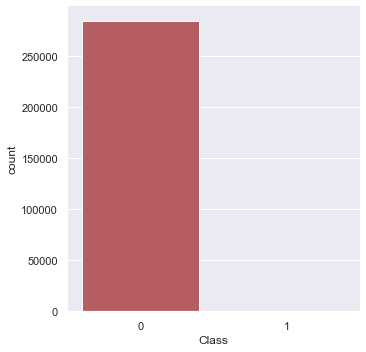

In [9]:
sns.catplot(x='Class' , kind='count' , data=df , palette=['r','g'])

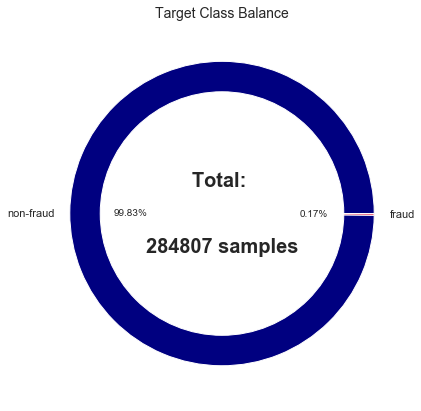

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
text = f'Total: \n\n\n{str(len(df))} samples'
donut_plot(col='Class', ax=ax, df=df, text=text)
ax.set_title('Target Class Balance', size=14)
plt.savefig('../reports/figures/class_balance_donut_plot.png',dpi=300)
plt.show()

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
df['Class'].value_counts(normalize=True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [13]:
# only 0.17% activities are fraud.
# out of 10_000 transactions, there are 17 cases of fraud.

In [14]:
# shuffle data
df = df.sample(frac=1)

df_low = df.loc[df['Class'] == 1 ]
df_high = df.loc[df['Class'] == 0][:df_low.shape[0]]

df_balanced = pd.concat([df_low, df_high])
df_balanced = df_balanced.sample(frac=1, random_state=random_state)

df_balanced['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

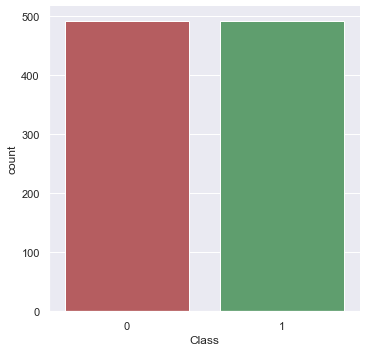

In [15]:
sns.catplot(x='Class' , kind='count' , data=df_balanced , palette=['r','g'],)

# Correlations

## Correlation with Target

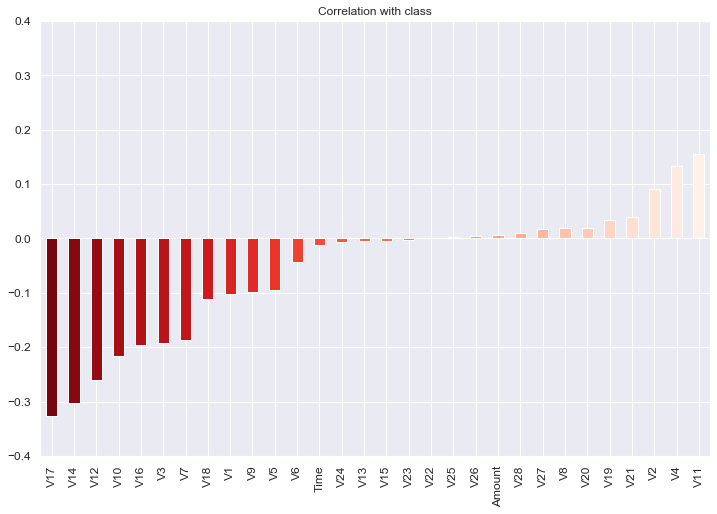

In [16]:
df.drop('Class',1).corrwith(df['Class']).sort_values()\
.plot.bar(figsize = (12, 8), title = "Correlation with class",
          fontsize = 12,rot = 90, grid = True,
          color=sns.color_palette('Reds_r',30),ylim=(-0.4,0.4)
       )

plt.savefig('../reports/figures/correlation_with_target.png',dpi=300)

In [17]:
# obs: v17,14,12,10,16,3,7 are negatively correlated with class.
# v2,4,11 have positive correlation with class

## Negative Correlations with Target

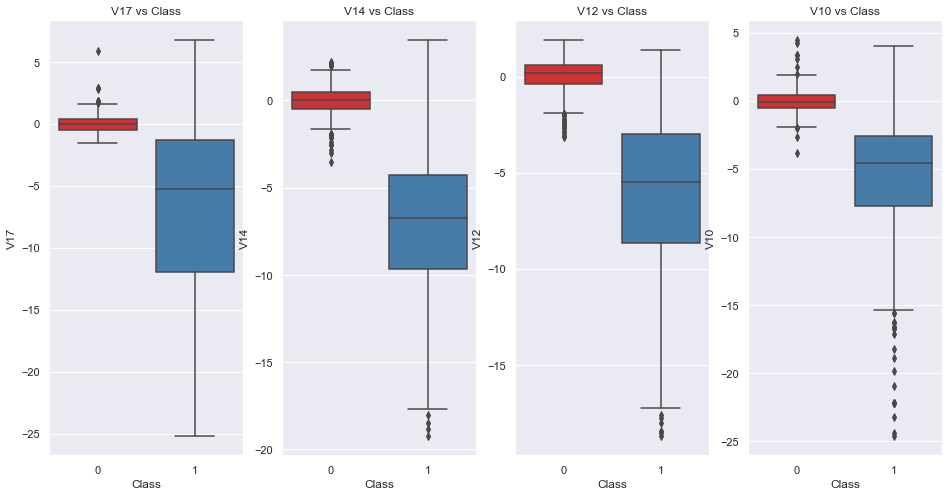

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(16,8))

sns.boxplot(x="Class", y="V17", data=df_balanced, palette='Set1', ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V14", data=df_balanced, palette='Set1', ax=axes[1])
axes[1].set_title('V14 vs Class')


sns.boxplot(x="Class", y="V12", data=df_balanced, palette='Set1', ax=axes[2])
axes[2].set_title('V12 vs Class')


sns.boxplot(x="Class", y="V10", data=df_balanced, palette='Set1', ax=axes[3])
axes[3].set_title('V10 vs Class')

plt.savefig('../reports/figures/negative_correlations_with_target.png',dpi=300)
plt.show()

## Positive Correlations with Target

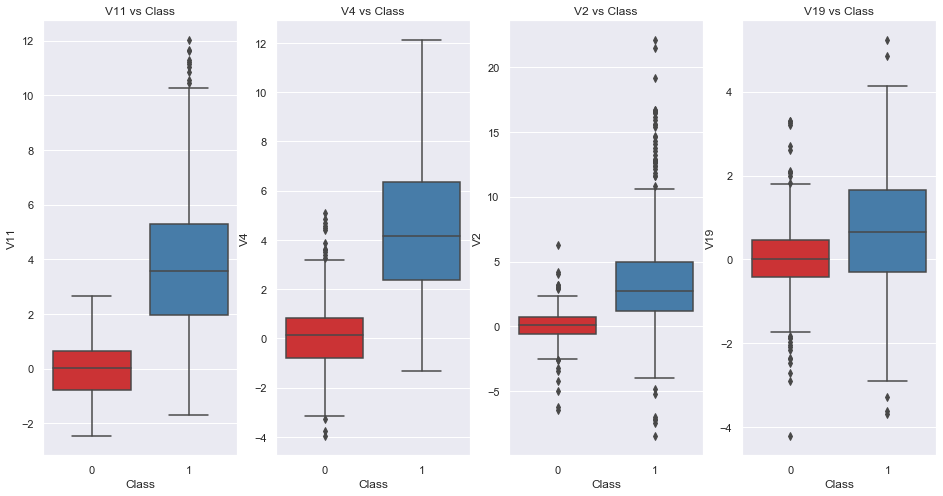

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(16,8))

sns.boxplot(x="Class", y="V11", data=df_balanced, palette='Set1', ax=axes[0])
axes[0].set_title('V11 vs Class')

sns.boxplot(x="Class", y="V4", data=df_balanced, palette='Set1', ax=axes[1])
axes[1].set_title('V4 vs Class')


sns.boxplot(x="Class", y="V2", data=df_balanced, palette='Set1', ax=axes[2])
axes[2].set_title('V2 vs Class')


sns.boxplot(x="Class", y="V19", data=df_balanced, palette='Set1', ax=axes[3])
axes[3].set_title('V19 vs Class')
plt.savefig('../reports/figures/positive_correlations_with_target.png',dpi=300)
plt.show()

## Correlations among Features

In [20]:
df_corr = df.drop(['Time','Amount','Class'],1).corr()

In [21]:
df_corr_style = df_corr.style.set_precision(2).background_gradient()

In [22]:
with open('../reports/figures/variables_correlation.html','w') as fo:
    fo.write(df_corr_style.render())

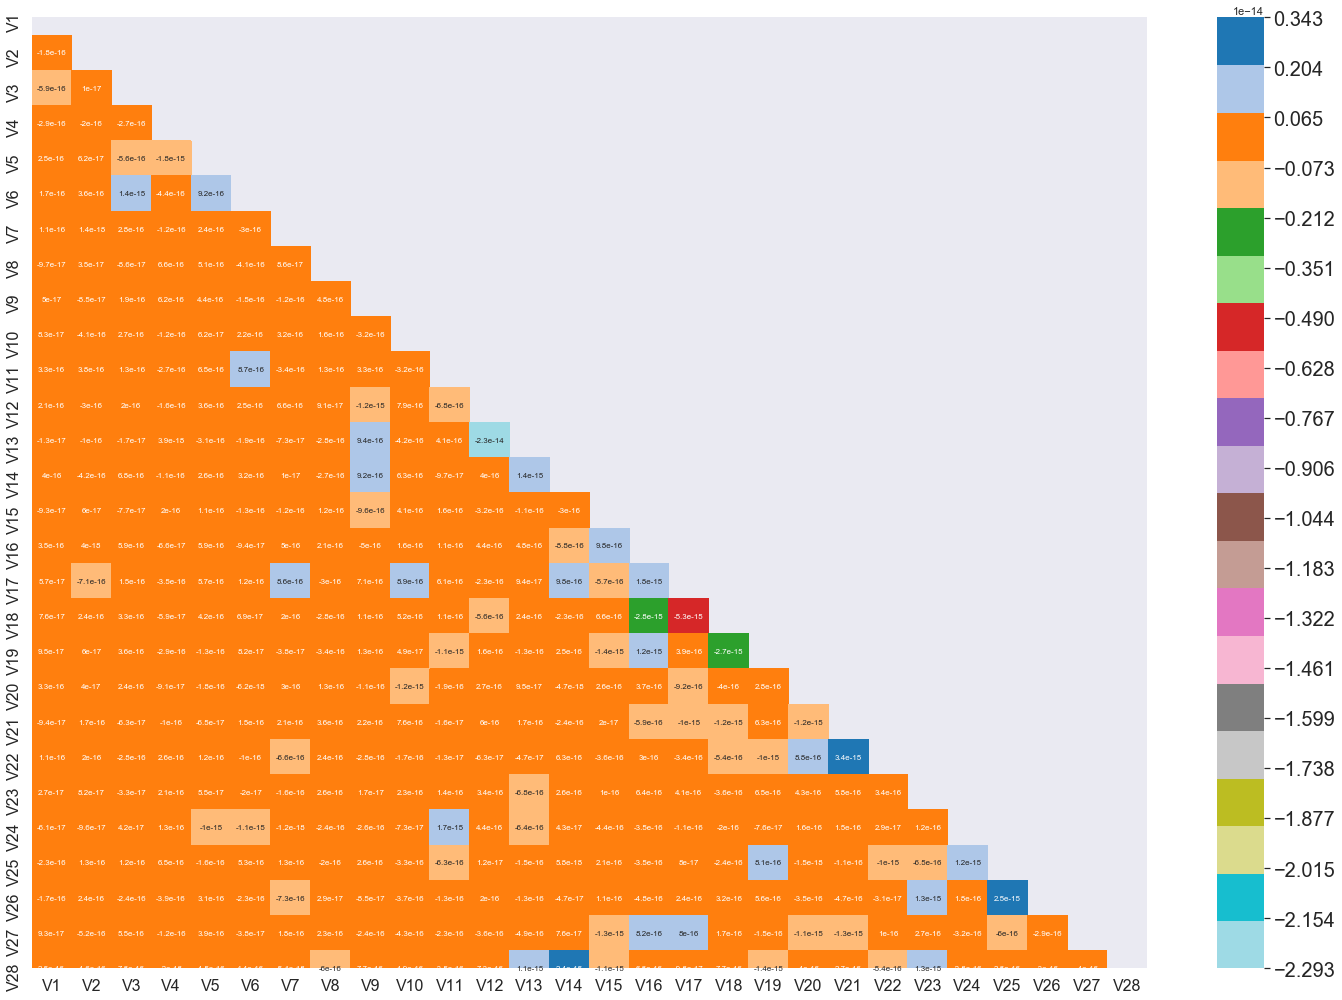

In [23]:
df_corr = df.drop(['Time','Amount','Class'],1).corr()

plt.figure(figsize=(20,14))
plt.subplots_adjust(bottom=0.01)
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
cbar_ticks = np.linspace(df_corr.min().min(), df_corr[df_corr!=1].max().max(), 20)

g = sns.heatmap(df_corr, cbar=True, annot=True, fmt='.2g',mask=mask,cmap='tab20_r',
           vmin=df_corr.min().min(), vmax=df_corr[df_corr!=1].max().max(),
            cbar_kws=dict(ticks=cbar_ticks,shrink=1.0),
            annot_kws={"size": 8}
           )

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png',dpi=300);

In [24]:
# 1. to see the large image open the saved image or saved html.
# 2. We can not see the annotations, but can see the colors.
# 3. I have used tab20 color palette it breaks values between 20 parts.

# Note that these variables are obtained after pca transformations,
# there is virtually no correlation, its almost zero.
#
# still, we can see most frequent correlation is 0.005e-14.
# we need to note that this dataset is heavily unblanced, to see the
# more relistic correlation we need to balance the dataset.

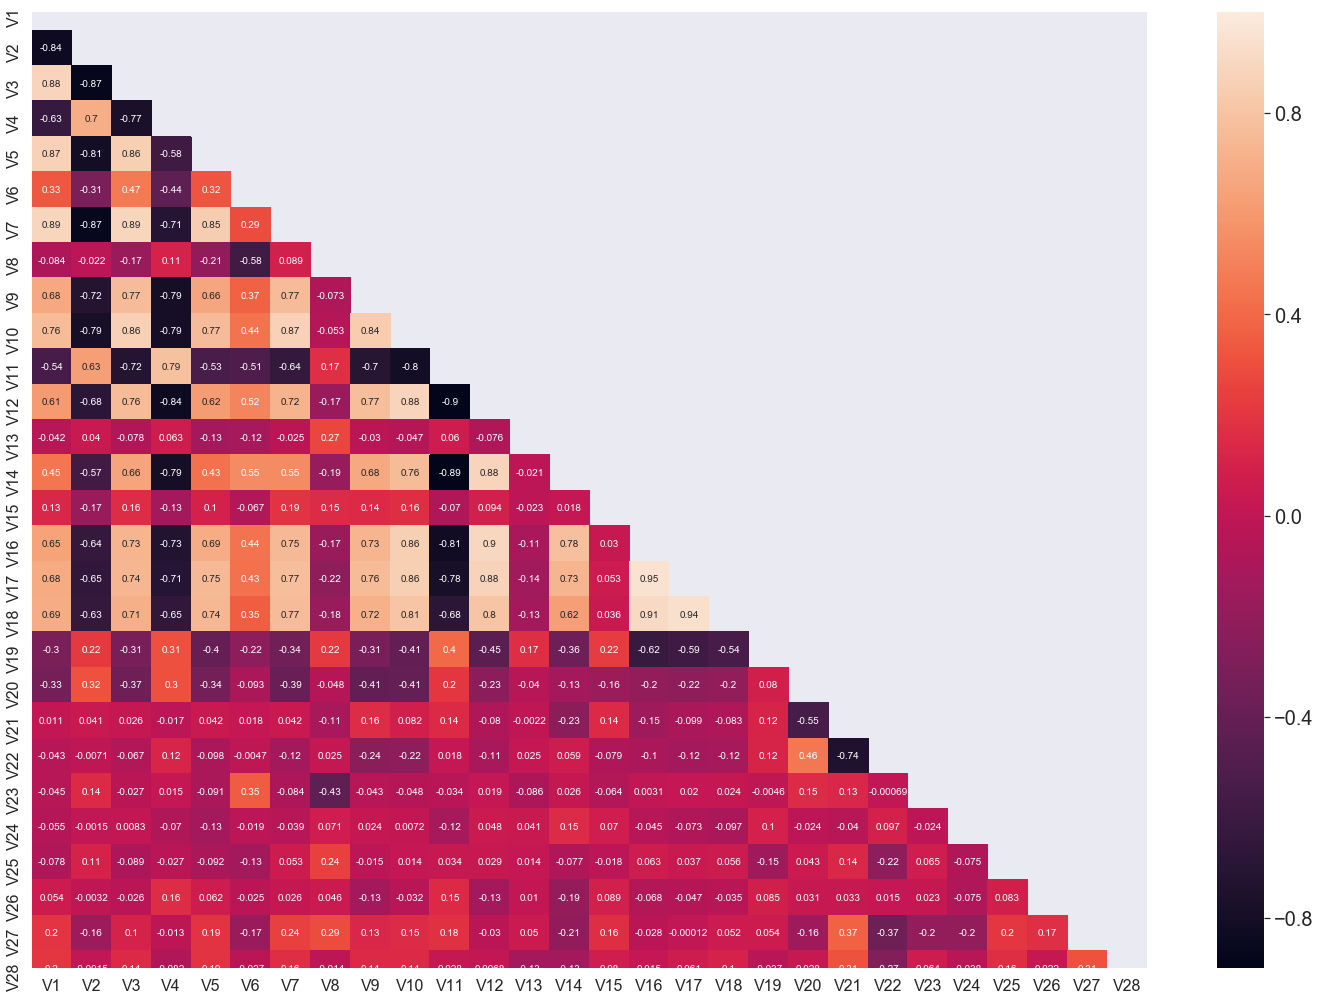

In [25]:
df_corr = df_balanced.drop(['Time','Amount','Class'],1).corr()

plt.figure(figsize=(20,14))
plt.subplots_adjust(bottom=0.01)

# make mask
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# heatmap
g = sns.heatmap(df_corr, cbar=True, annot=True, fmt='.2g',mask=mask)

# x and y ticks fontsize
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16)

# cbar ticks labelsize
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix_balanced.png',dpi=300);

# Histograms

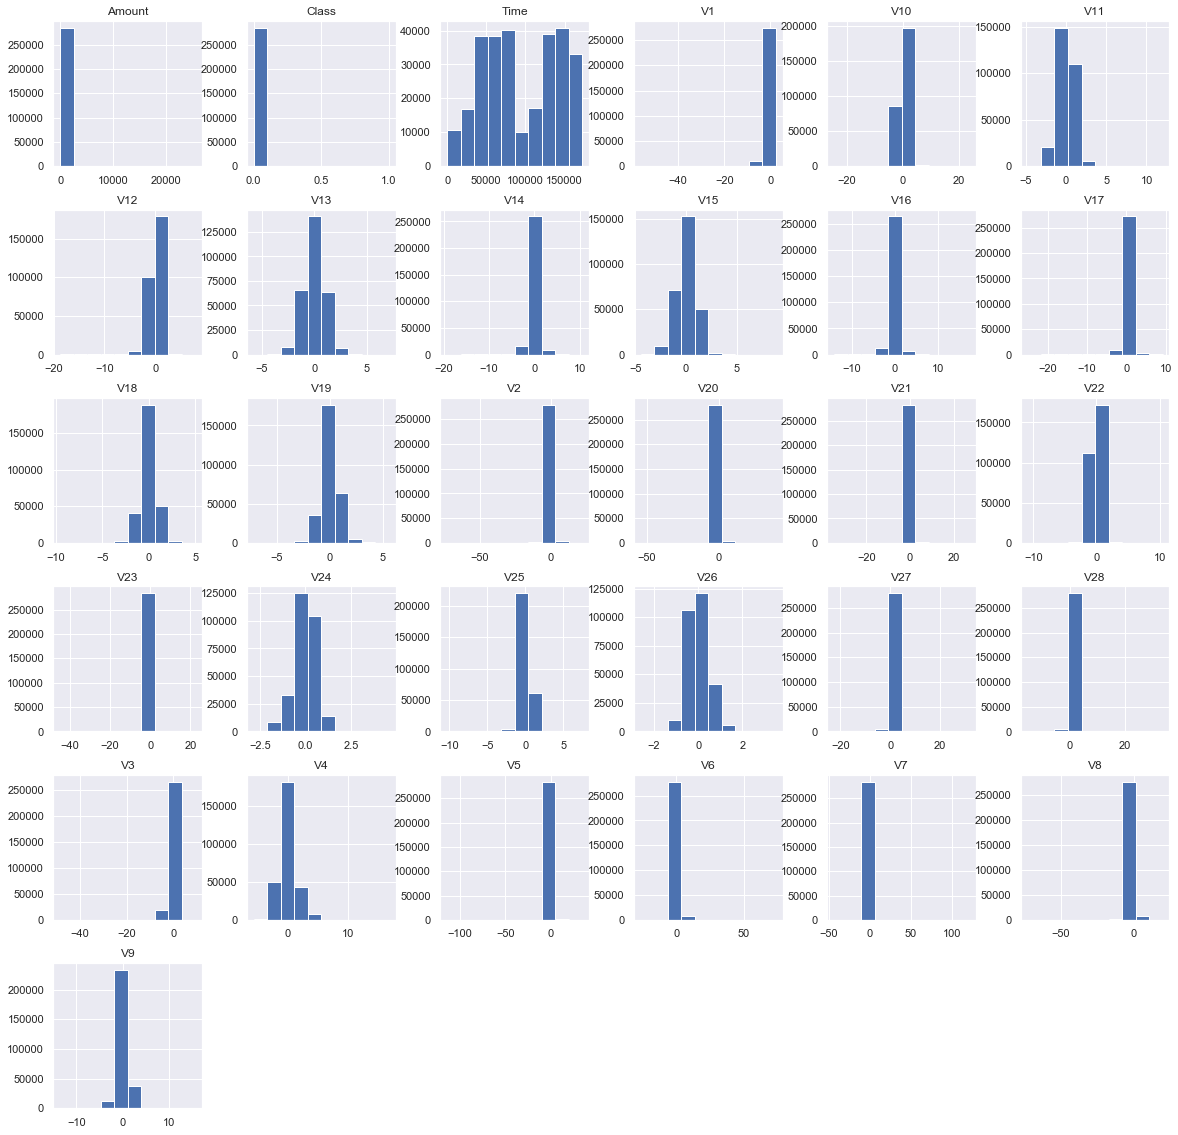

In [26]:
df.hist(figsize=(20,20));
plt.savefig('../reports/figures/all_features_histogram.png',dpi=300)

# Scatter plot of sampled data

In [27]:
%%writefile ../models/create_scatter_matrix.py

import pandas as pd
from pandas.plotting import scatter_matrix
import time

t0 = time.time()

df = pd.read_csv('../data/raw/creditcard.csv.zip',compression='zip')
df = df.sample(n=1000)

myfeatures = ['V{}'.format(i) for i in range(1,29)] + ['Amount']

# this takes long time to run, comment it.
scatter_matrix(df[myfeatures], diagonal='kde')
plt.savefig('../reports/figures/scatter_matrix_of_all_features.png',dpi=400)

t1 = time.time() - t0
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(t1,60)))

Overwriting ../models/create_scatter_matrix.py


In [28]:
# now go to terminal and run the script.

# Exploratory Data Analysis

## data info

In [29]:
df.info()
# there are no missing values, all values are float except class.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 101888 to 221810
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64


In [30]:
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


## Temporal variables

In [31]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [32]:
df['Time'].max()/60/60/24 # we have data of two days

1.9999074074074075

In [33]:
df['date'] = pd.to_datetime('2013-09-01') + pd.to_timedelta(df['Time'],unit='s')
df[['Time','date']].head()

,Time,date
101888,67971.0,2013-09-01 18:52:51
1526,1193.0,2013-09-01 00:19:53
116442,74279.0,2013-09-01 20:37:59
60953,49579.0,2013-09-01 13:46:19
25302,33549.0,2013-09-01 09:19:09


In [33]:
# create hour column
df['hour'] = df['date'].dt.hour
df[['Time','date','hour']].head()

,Time,date,hour
172787,121238.0,2013-09-02 09:40:38,9
196809,131704.0,2013-09-02 12:35:04,12
269156,163555.0,2013-09-02 21:25:55,21
76825,56763.0,2013-09-01 15:46:03,15
170158,120044.0,2013-09-02 09:20:44,9


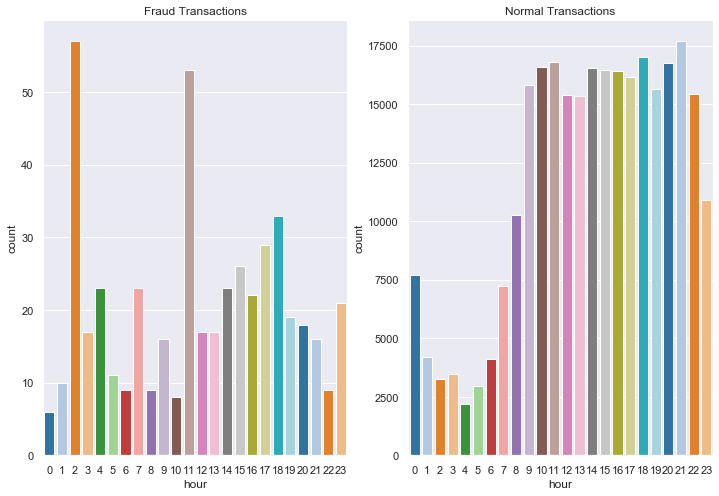

In [35]:
# count of transactions by hour

fig, ax =plt.subplots(1,2,figsize=(12,8))
sns.countplot(x='hour',data=df.query('Class == 1'),ax=ax[0],palette='tab20')
ax[0].set_title('Fraud Transactions')

sns.countplot(x='hour',data=df.query('Class == 0'),ax=ax[1],palette='tab20')
ax[1].set_title('Normal Transactions')

plt.savefig('../reports/figures/normal_and_fraud_transactions.png',dpi=400)

In [36]:
# obs: if the first transaction happened at 00:00 midnight, most fraudulunt
# activities happen at 21:00 i.e. 9pm to 10pm.

# 21 = 9pm, 22=10pm 23=11pm 24=0am.
#
# If the bank opens at 7AM and first transaction occur at 7AM, then
# peak fraudulent activity happens after 2 hours at 9AM. And another peak
# fraud activity happens after 11 hours at 6PM.

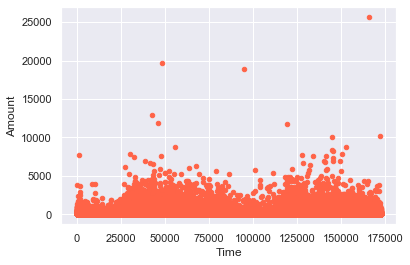

In [25]:
df.plot.scatter(x='Time',y='Amount',c='tomato')

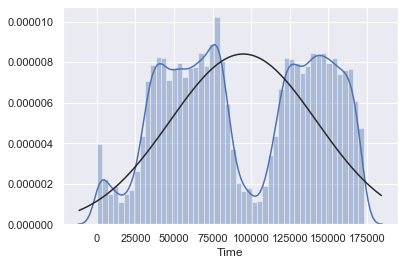

In [30]:
sns.distplot(df['Time'],fit=scipy.stats.norm);
plt.savefig('../reports/figures/distplot_time.png',dpi=300)

In [27]:
# time variable is not normalized, we need to normalize it.
from sklearn.preprocessing import StandardScaler

df['norm_Time'] = StandardScaler().fit_transform(df[['Time']])

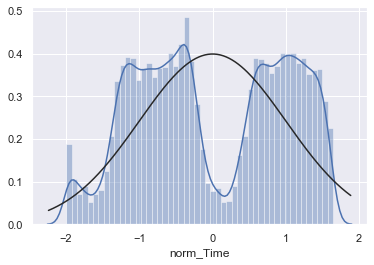

In [29]:
sns.distplot(df['norm_Time'],fit=scipy.stats.norm)
plt.savefig('../reports/figures/distplot_norm_time.png',dpi=300)

## Continuous variables

In [68]:
bins = [0,100,200,300,400,500,1000,5000,30_000]
labels = [1,2,3,4,5,6,7,8]
df['cat_Amount'] = pd.cut(df['Amount'], bins=bins, labels=labels)

In [69]:
df['cat_Amount'].head()

102737    1
179000    1
235572    1
123943    1
182534    1
Name: cat_Amount, dtype: category
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

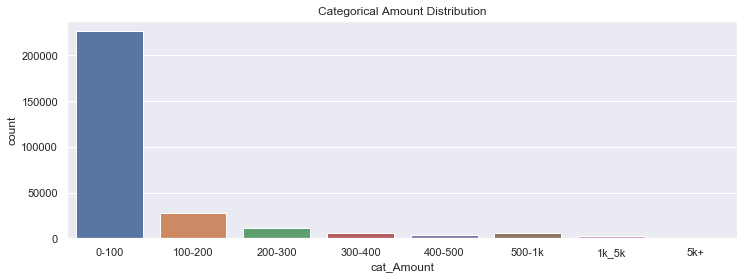

In [72]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df['cat_Amount'])
ax.set_xticklabels([ '0-100','100-200', '200-300','300-400','400-500',
                    '500-1k','1k_5k','5k+']);
plt.title('Categorical Amount Distribution')
plt.savefig('../reports/figures/cat_amount_countplot.png',dpi=300)

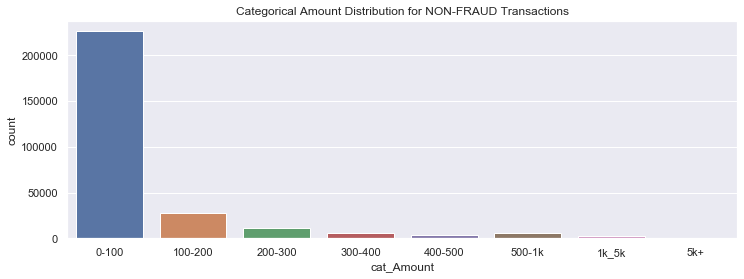

In [77]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df.loc[df['Class']==0, 'cat_Amount'])
ax.set_xticklabels([ '0-100','100-200', '200-300','300-400','400-500',
                    '500-1k','1k_5k','5k+']);
plt.title('Categorical Amount Distribution for NON-FRAUD Transactions')
plt.savefig('../reports/figures/cat_amount_countplot_non_fraud.png',dpi=300)

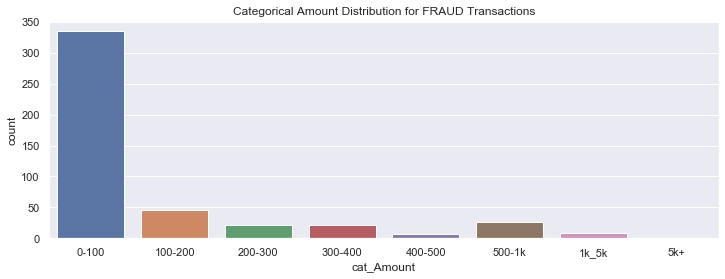

In [76]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df.loc[df['Class']==1, 'cat_Amount'])
ax.set_xticklabels([ '0-100','100-200', '200-300','300-400','400-500',
                    '500-1k','1k_5k','5k+']);
plt.title('Categorical Amount Distribution for FRAUD Transactions')
plt.savefig('../reports/figures/cat_amount_countplot_fraud.png',dpi=300)

In [42]:
df.groupby('Class').agg({'Amount': ['median', 'mean', 'max']})

Amount                      
      median        mean       max
Class                             
0      22.00   88.291022  25691.16
1       9.25  122.211321   2125.87

In [48]:
df['Amount'].describe()
# there is no negative number.

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [50]:
df.loc[df.Amount==0,:].head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,norm_Time
51150,44818.0,-1.503509,0.650070,1.979962,3.199407,-0.183885,1.864190,-1.367814,0.320220,-0.505109,0.502571,0.565402,0.881599,-0.457227,-0.050112,-0.961028,-0.944400,1.178761,-0.273874,0.779707,-0.397105,1.031552,0.808919,-0.299368,-0.206468,-0.547728,0.419715,0.168761,-0.095962,0.0,0,-1.052809
112777,72803.0,-2.026737,0.571666,1.447157,1.242799,-0.497292,0.493868,-1.083321,1.173734,-0.413958,-0.395616,-0.165359,0.402564,-0.238381,0.558138,0.400897,0.508801,-0.191827,1.387821,1.305281,-0.122539,0.296639,0.493929,-0.635835,-0.459467,0.308382,-0.059460,-0.329470,-0.194678,0.0,0,-0.463503


In [52]:
df.loc[df.Amount==0,:].shape # 1825 transactions are of ZERO dollars.

(1825, 32)

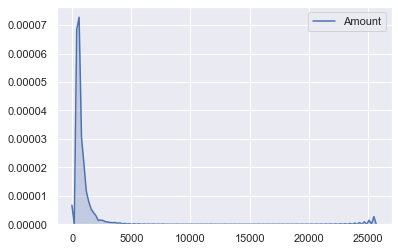

In [43]:
sns.kdeplot(df['Amount'],shade=True);

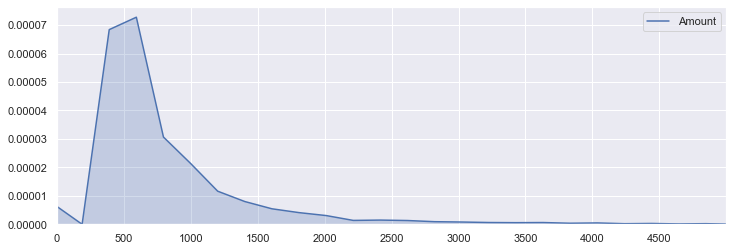

In [37]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['Amount'],shade=True);
plt.xlim(-1,5000)
plt.xticks(range(0,5000,500))
plt.savefig('../reports/figures/amount_kdeplot.png')
plt.show()

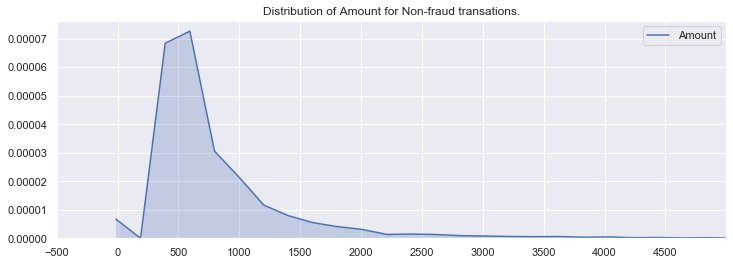

In [47]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[df['Class'] ==0, 'Amount'],shade=True);
plt.xlim(-1,5000)
plt.xticks(range(-500,5000,500))
plt.title('Distribution of Amount for Non-fraud transations.')
plt.savefig('../reports/figures/amount_non_fraud_kdeplot.png')
plt.show()

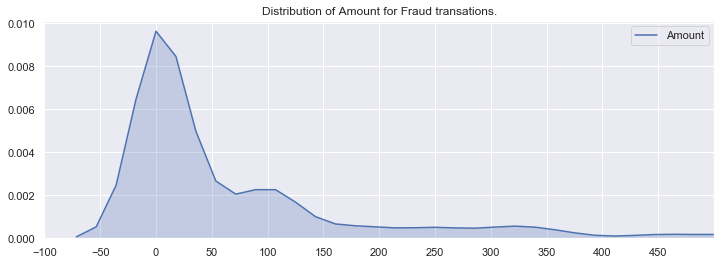

In [46]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[df['Class']==1, 'Amount'],shade=True);
plt.xlim(-1,500)
plt.xticks(range(-100,500,50))
plt.title('Distribution of Amount for Fraud transations.')
plt.savefig('../reports/figures/amount_fraud_kdeplot.png')
plt.show()

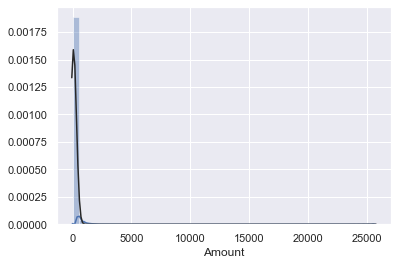

In [44]:
sns.distplot(df['Amount'],fit=stats.norm);

In [45]:
df['norm_Amount'] = StandardScaler().fit_transform(df[['Amount']])

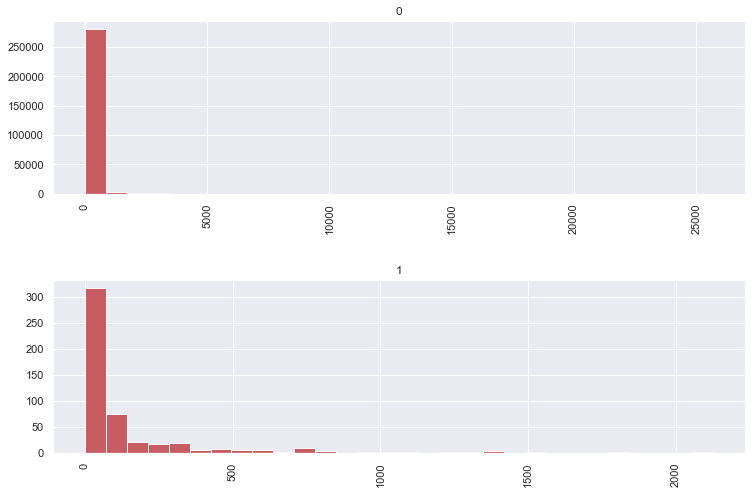

In [46]:
kwargs = dict(alpha=0.9,  bins=30,color='r',sharex=False,layout=(2,1))
df.hist(column='Amount', by='Class',figsize=(12,8),**kwargs);

In [47]:
# most of the fraud amount is <100$.

In [12]:
# the distribution is extremely skewed with a long tail.
# it is better to creat log columns

df['log1p_Amount'] = np.log1p(df['Amount'].values)

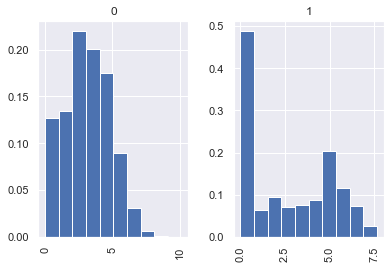

In [15]:
df.hist(column='log1p_Amount', by='Class', bins=10, density=True);

In [79]:
v_features = df.filter(regex='V').columns
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [98]:
def distplot_for_all_features():

    plt.figure(figsize=(12,28*4))
    gs = matplotlib.gridspec.GridSpec(28, 1)
    for i, cn in enumerate(df[v_features]):
        ax = plt.subplot(gs[i])
        sns.distplot(df[cn][df.Class == 1], bins=50)
        sns.distplot(df[cn][df.Class == 0], bins=50)
        ax.set_xlabel('')
        ax.set_title('histogram of feature: ' + str(cn))
    plt.show()
    
# distplot_for_all_features()

> From the distribution plot, we can see some of the features have very
similar distribution for fraud and non-fraud cases. 
We may drop these features and see the model results.

In [54]:
# from above distribution plot, I found some similar distributions.
similar_distribution_features = ['V28','V27','V26','V25','V24','V23','V22',
                                 'V20','V15','V13','V8']

In [94]:
def plot_distribution(df,col,show=False,xlim=None) : 
    figsize =( 15, 8)
    sns.set_style("ticks")
    s = sns.FacetGrid(df, hue = 'Class',aspect = 2.5,
                      palette ={0 : 'seagreen', 1 :'tomato'})
    
    s.map(sns.kdeplot, col, shade = True, alpha = 0.6)
    
    s.set(xlim=(df[col].min(), df[col].max()))
    s.fig.suptitle(f'Distribution plot of {col}')
    if xlim:
        s.set(xlim=xlim)
        s.fig.suptitle(f'Distribution plot of {col} for given x limit')
        
    s.add_legend()
    s.set_axis_labels(col, 'proportion')
    
    plt.xlabel('Feature Value')
    
    if xlim:
        plt.savefig(f'../reports/figures/distplots/distplot_{col}_selected_xlim.png')
    else:
        plt.savefig(f'../reports/figures/distplots/distplot_{col}.png')
        
    if show:
        plt.show()
    plt.close()

In [95]:
for v in v_features[:]:
    plot_distribution(df,v)

In [97]:
for v in v_features[:]:
    plot_distribution(df,v,xlim=(-10,10))

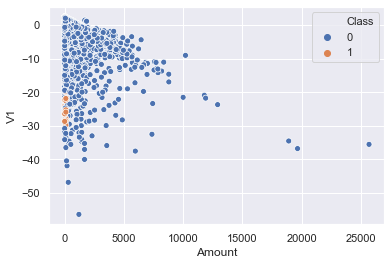

In [140]:
sns.scatterplot(x = 'Amount', y = 'V1',hue='Class',  data = df);

In [32]:
# mycols = ['V1', 'V2', 'V3', 'V15', 'V18','Amount']
# sns.pairplot(df, hue = 'Class', vars = mycols );

In [47]:
%%capture

def distplot_of_all_features():

    f,ax=plt.subplots(15,2,figsize=(12,60))

    col = ['V%s'%i for i in range(1,29)] + ['Amount','Time']

    for i,feature in enumerate(col):
        sns.distplot(df[df['Class']==1].dropna()[(feature)], ax=ax[i//2,i%2],
                     kde_kws={"color":"black"}, hist=False )

        sns.distplot(df[df['Class']==0].dropna()[(feature)], ax=ax[i//2,i%2],
                     kde_kws={"color":"black"}, hist=False )

        # Get the two lines from the ax[i//2,i%2]es to generate shading
        l1 = ax[i//2,i%2].lines[0]
        l2 = ax[i//2,i%2].lines[1]

        # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]
        x2 = l2.get_xydata()[:,0]
        y2 = l2.get_xydata()[:,1]
        ax[i//2,i%2].fill_between(x2,y2, color="deeppink", alpha=0.6)
        ax[i//2,i%2].fill_between(x1,y1, color="darkturquoise", alpha=0.6)

        #grid
        ax[i//2,i%2].grid(b=True, which='major', color='grey', linewidth=0.3)

        ax[i//2,i%2].set_title('{} by target'.format(feature), fontsize=18)
        ax[i//2,i%2].set_ylabel('count', fontsize=12)
        ax[i//2,i%2].set_xlabel('Modality', fontsize=12)

        #sns.despine(ax[i//2,i%2]=ax[i//2,i%2], left=True)
        ax[i//2,i%2].set_ylabel("frequency", fontsize=12)
        ax[i//2,i%2].set_xlabel(str(feature), fontsize=12)

    plt.tight_layout()
    plt.savefig('../reports/figures/distplots_of_all_features.png',dpi=300)
    plt.close()
    return None
    
distplot_of_all_features()

# TSNE visualization

In [1]:
%%writefile ../models/tsne_visualization.py

# Ref: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import time

# random state
random_state=100
np.random.seed=random_state
np.random.set_state=random_state

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

df = pd.read_csv('../data/raw/creditcard.csv.zip',compression='zip')


X = df.drop(['Time','Class'],axis=1)
y = df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2,
                      random_state=random_state).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2,
                    random_state=random_state).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized',
                             random_state=random_state
                            ).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

#========================== Plotting=============================


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0),
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1),
            cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0),
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1),
            cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0),
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1),
            cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.savefig('../reports/figures/tsne_visualization.png',dpi=300)

plt.close()

Writing ../models/tsne_visualization.py
